Trends:
1. Temperature increases across the world as you approach the equator. In March, the rate of temperature increase is greater in the Northern Hemisphere.
2. On average humidity levels rise as you approach the equator.
3. Cloudiness and wind speed are independent of latitude.

In [4]:
from citipy import citipy
import random 
import requests
import pandas as pd
import matplotlib.pyplot as plt
from config import api_key

#cities list will store the names of 700 cities whose longitude and latitude have been randomly selected
cities = []
#lat collects the latitudes of the cities
lat = []
#lng collects the longitudes of the cities
lng = []
#temp collects the current temperatutes of cities
temp = []
#humidity collects the current humidity of cities
humidity = []
#wspeed collects the current wind speed in cities
wspeed = []
#cloudiness collects the current cloudiness in cities
cloudiness = []

#randomly select a longitude and latitude and find the nearest city to this value, append city to cities list
#also append latitude and longitude to respective lists
#loop through 700 times to make sure at least 500 cities are included in graphs

for i in range(700):
    latitude = random.uniform(-90, 90)
    longitude = random.uniform(-180,180)
    
    city = citipy.nearest_city(float("{0:.2f}".format(latitude)), float("{0:.2f}".format(longitude)) )
    cities.append(city.city_name)
    
    lat.append("{0:.2f}".format(latitude))
    lng.append("{0:.2f}".format(longitude))

#this is the API that will be searched for weather data
url = "http://api.openweathermap.org/data/2.5/weather?"

#this variable is used to print the number of cities that have been searched
num = 1

print("Beginning Data Retrieval\n----------------------")

#this loops through 700 randomly selected cities and makes an API request to openweathermap for each city
#the json object that is returned is indexed to find the relevant weather data

for city in cities:
    query_url = '{0}appid={1}&q={2}&units=Imperial'.format(url,api_key,city)
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    print("Processing Record {0} | {1}".format(num, city))
    print(query_url)
    
    #this try/except block is used to account for cities that openweather does not recognize
    try:
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        wspeed.append(weather_json['wind']['speed'])
        cloudiness.append(weather_json['clouds']['all'])
        num += 1
    except KeyError:
        print("City not found")
        temp.append('NA')
        humidity.append('NA')
        wspeed.append('NA')
        cloudiness.append('NA')
        num += 1
        
print("-----------------------------\nData Retrieval Complete")

#all the above lists are combined into one dataframe that can be used for graphing weather data
weatherDF = pd.DataFrame({'Cities': cities, 'Temp': temp, 'Humidity': humidity, "Wind Speed": wspeed, 'Cloudiness':cloudiness, 'Latitude': lat, 'Longitude': lng})

#this removes all of the rows in the dataframe that are missing information
weatherDF = weatherDF.loc[weatherDF.loc[:, 'Temp'] != 'NA', :]

#create csv of data
weatherDF.to_csv('City_Weather_Data')

#display number of rows in new dataframe
weatherDF.count()

Beginning Data Retrieval
----------------------
Processing Record 1 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=quatre cocos&units=Imperial
Processing Record 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=ushuaia&units=Imperial
Processing Record 3 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=georgetown&units=Imperial
Processing Record 4 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=dikson&units=Imperial
Processing Record 5 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=butaritari&units=Imperial
Processing Record 6 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=puerto ayora&units=Imperial
Processing Record 7 | kondinskoye
http://api.openweathermap.org/data/2.5/wea

Processing Record 57 | balkhash
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=balkhash&units=Imperial
Processing Record 58 | alta floresta
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=alta floresta&units=Imperial
Processing Record 59 | vila do maio
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=vila do maio&units=Imperial
Processing Record 60 | moen
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=moen&units=Imperial
Processing Record 61 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=puerto ayora&units=Imperial
Processing Record 62 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=narsaq&units=Imperial
Processing Record 63 | kieta
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=kieta

Processing Record 113 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=hermanus&units=Imperial
Processing Record 114 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=bethel&units=Imperial
Processing Record 115 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=komsomolskiy&units=Imperial
Processing Record 116 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=vaini&units=Imperial
Processing Record 117 | narsaq
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=narsaq&units=Imperial
Processing Record 118 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=rikitea&units=Imperial
Processing Record 119 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=hobart&units=Imperi

Processing Record 169 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=nouadhibou&units=Imperial
Processing Record 170 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=hilo&units=Imperial
Processing Record 171 | buala
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=buala&units=Imperial
Processing Record 172 | ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=ulladulla&units=Imperial
Processing Record 173 | bonfim
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=bonfim&units=Imperial
Processing Record 174 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=mar del plata&units=Imperial
Processing Record 175 | bermejillo
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=bermejill

Processing Record 226 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=illoqqortoormiut&units=Imperial
City not found
Processing Record 227 | flinders
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=flinders&units=Imperial
Processing Record 228 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=atuona&units=Imperial
Processing Record 229 | udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=udachnyy&units=Imperial
Processing Record 230 | sorland
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=sorland&units=Imperial
Processing Record 231 | caconda
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=caconda&units=Imperial
Processing Record 232 | olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d50

Processing Record 282 | castro
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=castro&units=Imperial
Processing Record 283 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=rikitea&units=Imperial
Processing Record 284 | kirovskiy
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=kirovskiy&units=Imperial
Processing Record 285 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=barrow&units=Imperial
Processing Record 286 | lucea
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=lucea&units=Imperial
Processing Record 287 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=hasaki&units=Imperial
Processing Record 288 | tekeli
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=tekeli&units=Imperial
Process

http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=kapaa&units=Imperial
Processing Record 339 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=thompson&units=Imperial
Processing Record 340 | warrnambool
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=warrnambool&units=Imperial
Processing Record 341 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=chokurdakh&units=Imperial
Processing Record 342 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=torbay&units=Imperial
Processing Record 343 | sungairaya
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=sungairaya&units=Imperial
Processing Record 344 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=kapaa&units=Imperial
Processing Record

Processing Record 395 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=punta arenas&units=Imperial
Processing Record 396 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=sioux lookout&units=Imperial
Processing Record 397 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=ushuaia&units=Imperial
Processing Record 398 | isangel
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=isangel&units=Imperial
Processing Record 399 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=arraial do cabo&units=Imperial
Processing Record 400 | canutama
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=canutama&units=Imperial
Processing Record 401 | viligili
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922

Processing Record 452 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=bredasdorp&units=Imperial
Processing Record 453 | planaltina
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=planaltina&units=Imperial
Processing Record 454 | faanui
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=faanui&units=Imperial
Processing Record 455 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=hermanus&units=Imperial
Processing Record 456 | kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=kaitangata&units=Imperial
Processing Record 457 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=tuktoyaktuk&units=Imperial
Processing Record 458 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d50011481

Processing Record 509 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=amderma&units=Imperial
City not found
Processing Record 510 | kodiak
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=kodiak&units=Imperial
Processing Record 511 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=punta arenas&units=Imperial
Processing Record 512 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=hobart&units=Imperial
Processing Record 513 | zhangjiakou
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=zhangjiakou&units=Imperial
Processing Record 514 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=bredasdorp&units=Imperial
Processing Record 515 | papetoai
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d50

Processing Record 565 | muisne
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=muisne&units=Imperial
Processing Record 566 | belebey
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=belebey&units=Imperial
Processing Record 567 | castro
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=castro&units=Imperial
Processing Record 568 | albany
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=albany&units=Imperial
Processing Record 569 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=jamestown&units=Imperial
Processing Record 570 | balimo
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=balimo&units=Imperial
City not found
Processing Record 571 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=esperance

Processing Record 621 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=busselton&units=Imperial
Processing Record 622 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=rikitea&units=Imperial
Processing Record 623 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=new norfolk&units=Imperial
Processing Record 624 | podgorodnyaya pokrovka
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=podgorodnyaya pokrovka&units=Imperial
Processing Record 625 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=jamestown&units=Imperial
Processing Record 626 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=saskylakh&units=Imperial
Processing Record 627 | rio grande
http://api.openweathermap.org/data/2.5/weather?appid=a2f6

Processing Record 678 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=vaini&units=Imperial
Processing Record 679 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=bathsheba&units=Imperial
Processing Record 680 | te anau
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=te anau&units=Imperial
Processing Record 681 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=kapaa&units=Imperial
Processing Record 682 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=vila velha&units=Imperial
Processing Record 683 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=vaini&units=Imperial
Processing Record 684 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=a2f6e46a145b1922f9d5001148190c6a&q=hermanus&units=Imperial

Cities        632
Cloudiness    632
Humidity      632
Latitude      632
Longitude     632
Temp          632
Wind Speed    632
dtype: int64

PLOTS

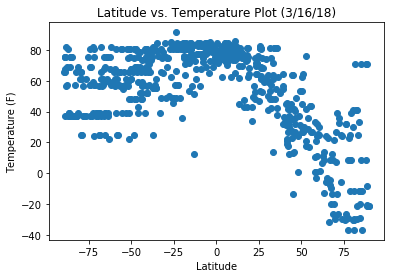

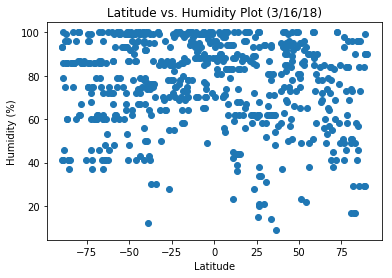

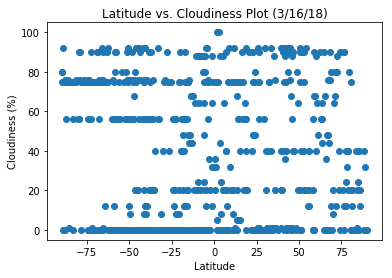

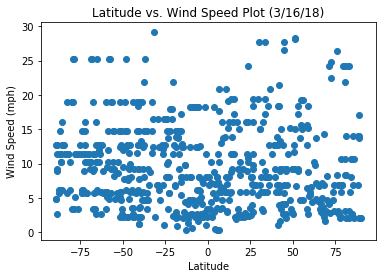

In [5]:
import matplotlib.pyplot as plt

plt.title('Latitude vs. Temperature Plot (3/16/18)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.scatter(weatherDF['Latitude'].apply(float), weatherDF['Temp'])
plt.show()

plt.title('Latitude vs. Humidity Plot (3/16/18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(weatherDF['Latitude'].apply(float), weatherDF['Humidity'])
plt.show()

plt.title('Latitude vs. Cloudiness Plot (3/16/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(weatherDF['Latitude'].apply(float), weatherDF['Cloudiness'])
plt.show()

plt.title('Latitude vs. Wind Speed Plot (3/16/18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(weatherDF['Latitude'].apply(float), weatherDF['Wind Speed'])
plt.show()